In [142]:
import ROOT
from matplotlib import pyplot as plt
import pandas as pd

In [408]:
file_name = "rechit_histograms.root"
my_file = ROOT.TFile.Open(file_name)

In [409]:
#open file and read in histograms
my_file.cd()
histograms = {}
for key in my_file.GetListOfKeys():
    hist = key.ReadObj()
    histograms[hist.GetName()] = hist
    

In [410]:
# loop over all histograms and retrieve mean and std dev

def parse_hist_name(hist_name):
    l1 = l2 = l3 = -1
    cut = "minus one"
    if len(hist_name.split("_")) > 1:
        (cut, l1, l2, l3) = hist_name.split("_")
    return (cut, int(l1), int(l2), int(l3)) 

df = pd.DataFrame(columns=["cut", "entries", "mean", "std dev", "triplet ID", "layer 1", "layer 2", "layer 3", "label"])
cuts = ["dca", "theta", "rc", "dcaRc"]
for hist_name in histograms:
    (cut, layer1, layer2, layer3) = parse_hist_name(hist_name)
    mean = histograms[hist_name].GetMean()
    stddev = histograms[hist_name].GetStdDev()
    entries = histograms[hist_name].GetEntries()

    if cut != "minus one":
        df_tmp = pd.DataFrame({"cut": cut, 
                               "entries": entries, 
                               "mean": mean, 
                               "std dev":stddev, 
                               "triplet ID":-1, 
                               "layer 1": layer1,
                               "layer 2": layer2,
                               "layer 3": layer3,
                               "label": str(layer1) + "_" + str(layer2) + "_" + str(layer3)}, index=[0])
        df = pd.concat([df, df_tmp], ignore_index=True)
df.set_index("label",drop=True,inplace=True)
df    

/var/folders/0m/wpyd3rf50ndd6p3t8qxnqkjm0000gn/T/ipykernel_71395/2353789555.py:28: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, df_tmp], ignore_index=True)


,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
label,,,,,,,,
0_1_2,dca,66408.0,0.158985,0.281720,-1,0,1,2
0_1_4,dca,9266.0,0.385880,0.532394,-1,0,1,4
0_1_7,dca,6687.0,0.141381,0.253649,-1,0,1,7
0_1_3,dca,23938.0,0.138279,0.212564,-1,0,1,3
0_4_5,dca,2251.0,0.547718,1.029876,-1,0,4,5
...,...,...,...,...,...,...,...,...
8_9_11,theta,33.0,1.191538,0.917562,-1,8,9,11
8_10_11,theta,182.0,0.835585,0.690439,-1,8,10,11
3_10_11,theta,828.0,1.316862,0.876028,-1,3,10,11


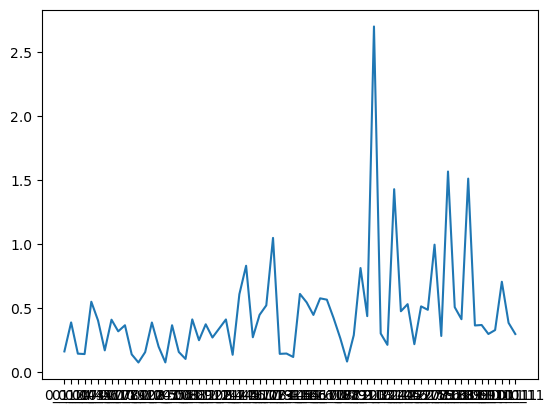

In [411]:
plt.plot( df.loc[df["cut"]=="dca","mean"])

In [412]:
hasStrip = (df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)
hasNoStrip =  (df["layer 2"] != 10) & (df["layer 2"] != 11) & (df["layer 3"] != 10) & (df["layer 3"] != 11)

In [413]:
df[hasStrip & (df["entries"] > 30) & (df["cut"] == "dca")]

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
label,,,,,,,,
0_4_10,dca,17684.0,0.167157,0.425189,-1,0,4,10
0_4_11,dca,390.0,0.407215,0.561208,-1,0,4,11
0_7_10,dca,5527.0,0.135771,0.226948,-1,0,7,10
0_7_11,dca,3398.0,0.072394,0.228762,-1,0,7,11
0_2_10,dca,79776.0,0.073000,0.159244,-1,0,2,10
0_5_10,dca,14012.0,0.154644,0.386016,-1,0,5,10
0_5_11,dca,2845.0,0.100015,0.288572,-1,0,5,11
0_8_10,dca,7652.0,0.246646,0.484497,-1,0,8,10
0_8_11,dca,171.0,0.371199,0.490456,-1,0,8,11


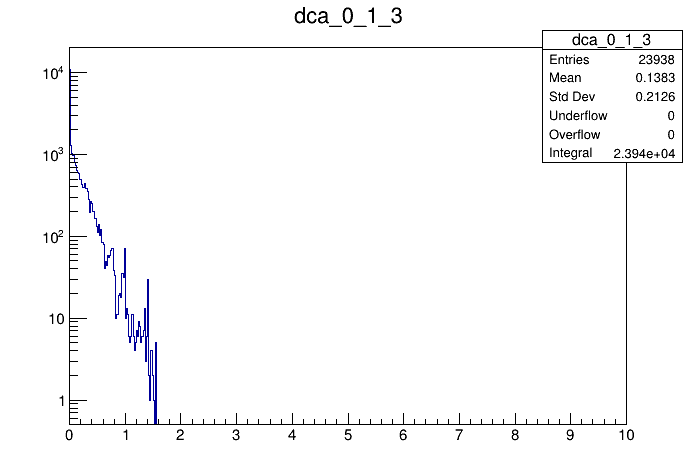

In [414]:
c = ROOT.TCanvas()
histograms["dca_0_1_3"].Draw()
ROOT.gStyle.SetOptStat(1111111)
c.SetLogy()
c.Draw()

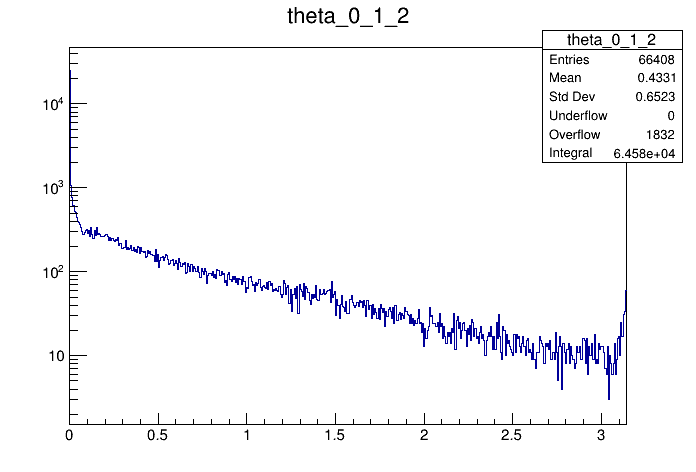

In [415]:
c = ROOT.TCanvas()
histograms["theta_0_1_2"].Draw()
ROOT.gStyle.SetOptStat(1111111)
c.SetLogy()
c.Draw()

In [416]:
df[hasNoStrip & (df["entries"] > 0) & (df["cut"] == "dca")]

,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3
label,,,,,,,,
0_1_2,dca,66408.0,0.158985,0.281720,-1,0,1,2
0_1_4,dca,9266.0,0.385880,0.532394,-1,0,1,4
0_1_7,dca,6687.0,0.141381,0.253649,-1,0,1,7
0_1_3,dca,23938.0,0.138279,0.212564,-1,0,1,3
0_4_5,dca,2251.0,0.547718,1.029876,-1,0,4,5
0_4_6,dca,2855.0,0.400866,0.834018,-1,0,4,6
0_7_8,dca,259.0,0.316145,0.311013,-1,0,7,8
0_7_9,dca,359.0,0.363724,0.341789,-1,0,7,9
0_2_3,dca,19608.0,0.153142,0.304828,-1,0,2,3


In [417]:
#adding a figure of merit:
df["FoM"] = df["mean"] + 2 * df["std dev"]

In [418]:
#How many events survive the FoM cut?

fom_efficiency = []
for index, row in df.iterrows():
    hist_name = row["cut"] + "_" + str(row["layer 1"]) + "_" + str(row["layer 2"]) + "_" + str(row["layer 3"])
    fom = row["FoM"]
    n = histograms[hist_name].Integral(0, int(histograms[hist_name].FindFixBin(fom)))
    d = histograms[hist_name].Integral(0, int(histograms[hist_name].FindFixBin(5000)))
    fom_efficiency.append(n/d)

df["FoM efficiency"] = fom_efficiency

df


,cut,entries,mean,std dev,triplet ID,layer 1,layer 2,layer 3,FoM,FoM efficiency
label,,,,,,,,,,
0_1_2,dca,66408.0,0.158985,0.281720,-1,0,1,2,0.722424,0.962188
0_1_4,dca,9266.0,0.385880,0.532394,-1,0,1,4,1.450668,0.967192
0_1_7,dca,6687.0,0.141381,0.253649,-1,0,1,7,0.648679,0.944818
0_1_3,dca,23938.0,0.138279,0.212564,-1,0,1,3,0.563407,0.954340
0_4_5,dca,2251.0,0.547718,1.029876,-1,0,4,5,2.607470,0.936473
...,...,...,...,...,...,...,...,...,...,...
8_9_11,theta,33.0,1.191538,0.917562,-1,8,9,11,3.026661,0.909091
8_10_11,theta,182.0,0.835585,0.690439,-1,8,10,11,2.216464,0.934066
3_10_11,theta,828.0,1.316862,0.876028,-1,3,10,11,3.068918,0.983092


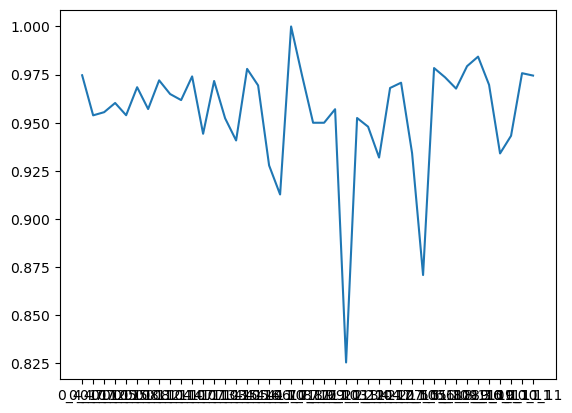

In [421]:
plt.plot(df.loc[(df["cut"]=="dca") & hasStrip,"FoM efficiency"])

In [422]:
df.set_index("label",drop=True,inplace=True)

KeyError: "None of ['label'] are in the columns"

<Axes: xlabel='label'>

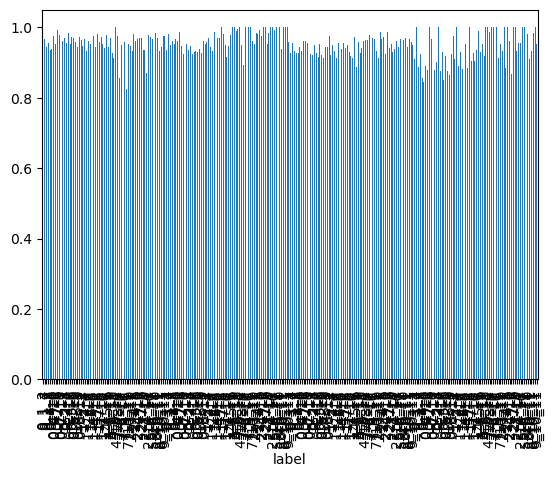

In [423]:
df["FoM efficiency"].plot.bar()

<Axes: xlabel='label'>

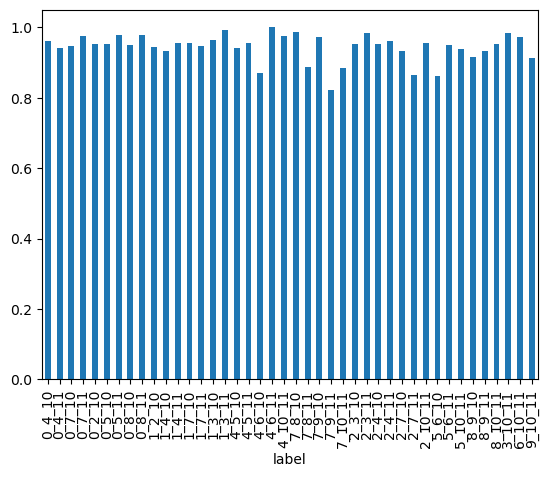

In [400]:
df.loc[(df["cut"]=="dca") & ((df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)),"FoM efficiency"].plot.bar()

<Axes: xlabel='label'>

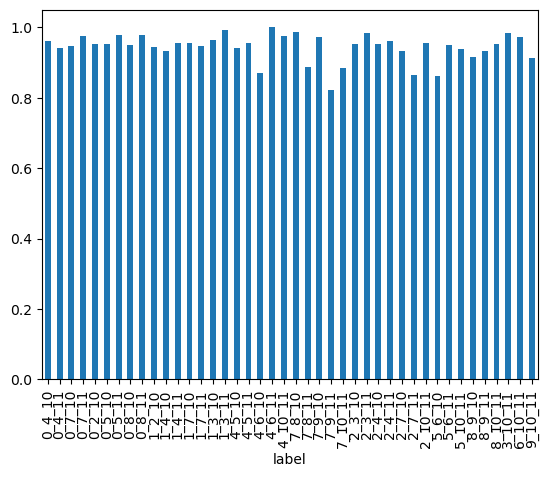

In [404]:
df.loc[(df["cut"]=="dca") & ((df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)),"FoM efficiency"].plot.bar()

In [405]:
df.loc[(df["cut"]=="dca") & ((df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)),"FoM efficiency"]

label
0_4_10     0.960375
0_4_11     0.941757
0_7_10     0.947262
0_7_11     0.974098
0_2_10     0.952249
0_5_10     0.952754
0_5_11     0.977549
0_8_10     0.949355
0_8_11     0.978671
1_2_10     0.944647
1_4_10     0.932669
1_4_11     0.955870
1_7_10     0.954962
1_7_11     0.946115
1_3_10     0.963565
1_3_11     0.993488
4_5_10     0.941001
4_5_11     0.955980
4_6_10     0.870852
4_6_11     1.000000
4_10_11    0.974277
7_8_10     0.986842
7_8_11     0.887892
7_9_10     0.973529
7_9_11     0.822687
7_10_11    0.883721
2_3_10     0.952869
2_3_11     0.984577
2_4_10     0.951518
2_4_11     0.961690
2_7_10     0.932727
2_7_11     0.864513
2_10_11    0.955943
5_6_10     0.863076
5_6_11     0.950437
5_10_11    0.938144
8_9_10     0.914392
8_9_11     0.933333
8_10_11    0.952941
3_10_11    0.982796
6_10_11    0.971510
9_10_11    0.912752
Name: FoM efficiency, dtype: float64

<Axes: xlabel='label'>

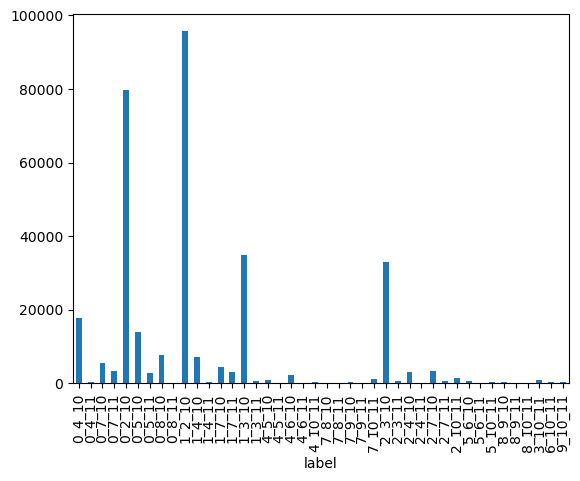

In [427]:
df.loc[(df["cut"]=="dca") & ((df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)),"entries"].plot.bar()

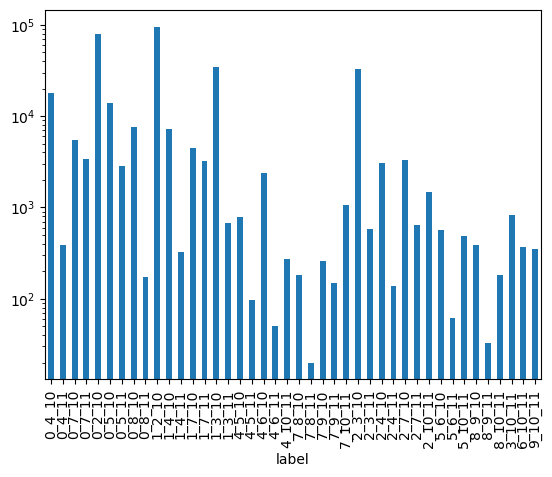

In [428]:
fig, ax = plt.subplots()
df.loc[(df["cut"]=="dca") & ((df["layer 2"] == 10) | (df["layer 2"] == 11) | (df["layer 3"] == 10) | (df["layer 3"] == 11)),"entries"].plot.bar()
ax.set_yscale('log')